In [4]:
!pip install keras

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [4]:
(x_train, y_train) , (x_test,y_test) = mnist.load_data()
print(y_test[0])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
7


In [5]:
x_train = x_train.reshape((x_train.shape[0], 28,28,1))
x_test = x_test.reshape((x_test.shape[0], 28,28,1))

In [8]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

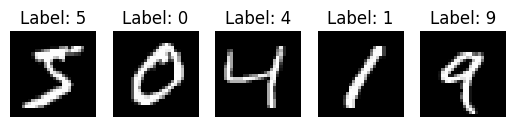

In [6]:
from matplotlib import pyplot as plt

def display(images, labels, num_images=8):
  for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')

  plt.show()

display(x_train, y_train, num_images=5)

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_test.shape)

(10000, 10)


In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.add(layers.MaxPooling2D((2,2)))

In [12]:
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [13]:
model.add(layers.MaxPooling2D((2,2)))

In [14]:
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [15]:
model.add(layers.Flatten())

In [16]:
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 54s 67ms/step - accuracy: 0.8490 - loss: 0.4812 - val_accuracy: 0.9801 - val_loss: 0.0716
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 65ms/step - accuracy: 0.9788 - loss: 0.0647 - val_accuracy: 0.9845 - val_loss: 0.0536
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.9891 - loss: 0.0371 - val_accuracy: 0.9868 - val_loss: 0.0454
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 65ms/step - accuracy: 0.9889 - loss: 0.0313 - val_accuracy: 0.9866 - val_loss: 0.0458
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.9924 - loss: 0.0246 - val_accuracy: 0.9893 - val_loss: 0.0374


In [19]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9886 - loss: 0.0380
Test Loss: 0.029808728024363518, Test Accuracy: 0.9909999966621399
